In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [30]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas7/grid.nc')
grid6 = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

data = xr.open_dataset('/agdat1/parker/LO_roms/cas7_t0_x4b/f2017.10.12/ocean_his_0023.nc')
works = xr.open_dataset('/agdat1/parker/LO_roms/cas7_t0_x4b/f2017.10.12/ocean_his_0021.nc') # why is there no crash on some timesteps?

(50.0, 400.0)

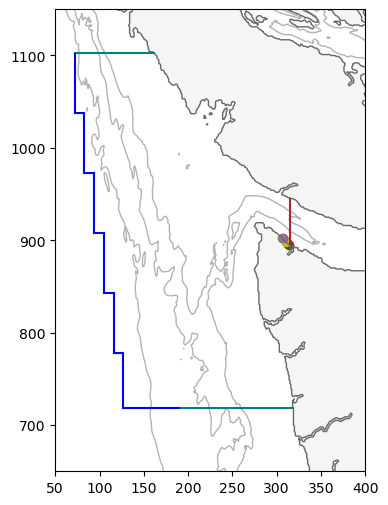

In [25]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the coast crash spots
ax.scatter([315-1],[896-1],c='r') # 149
ax.scatter([314-1],[897-1],c='g') # 17
ax.scatter([311-1],[900-1],c='orange') # 25
ax.scatter([313-1],[898-1],c='purple') # 8
ax.scatter([312-1],[899-1],c='y') # 11
ax.scatter([308-1],[903-1],c='magenta') # 1
ax.scatter([307-1],[904-1],c='grey') # 1

# and the new boundaries
plt.plot([315,315], [896,945], c='brown')
plt.plot([ 72,162],[1103,1103], c='teal')
plt.plot([127,192],[ 718, 718], c='b')
plt.plot([116,127],[ 778, 778], c='b')
plt.plot([105,116],[ 843, 843], c='b')
ax.set_xlim([50,400])

(280.0, 330.0)

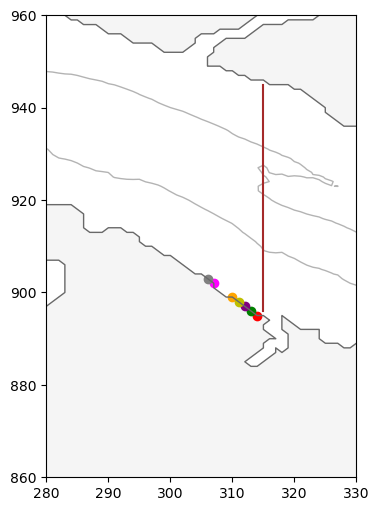

In [26]:
fig, ax = plt.subplots(1,1,figsize=(4, 6))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)

ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(X, Y,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5)

# the coast crash spots
ax.scatter([315-1],[896-1],c='r') # 149
ax.scatter([314-1],[897-1],c='g') # 17
ax.scatter([311-1],[900-1],c='orange') # 25
ax.scatter([313-1],[898-1],c='purple') # 8
ax.scatter([312-1],[899-1],c='y') # 11
ax.scatter([308-1],[903-1],c='magenta') # 1
ax.scatter([307-1],[904-1],c='grey') # 1

# and the new boundaries
plt.plot([315,315], [896,945], c='brown')
plt.plot([ 72,162],[1103,1103], c='teal')
plt.plot([127,192],[ 718, 718], c='b')
plt.plot([116,127],[ 778, 778], c='b')
plt.plot([105,116],[ 843, 843], c='b')
plt.plot([ 94,105],[ 908, 908], c='b')
plt.plot([ 83, 94],[ 973, 973], c='b')
plt.plot([ 72, 83],[1038,1038], c='b')
plt.plot([ 72, 72],[1038,1102], c='b')
plt.plot([ 83, 83],[ 973,1038], c='b')
plt.plot([ 94, 94],[ 908, 973], c='b')
plt.plot([105,105],[ 843, 908], c='b')
plt.plot([116,116],[ 778, 843], c='b')
plt.plot([127,127],[ 718, 778], c='b')
plt.plot([192,318],[ 718, 718], c='teal')

ax.set_ylim([860,960])
ax.set_xlim([280,330])

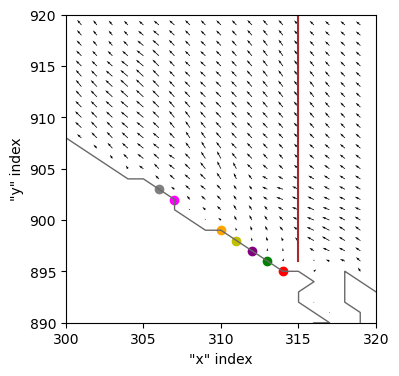

In [27]:
X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
k=23
xmin, xmax = 300,320
ymin, ymax = 890,920

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

    # Overlay domain landmask and coastline
# ax.contourf(X, Y, grid.mask_rho, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
# ax.contour(X, Y,grid.h, linewidths=1, levels=[5, 10, 20, 100], colors='dimgray', alpha=0.5)
ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

# QUIVER! 
ax.quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],data.u[0,k,ymin:ymax,xmin:xmax],data.v[0,k,ymin:ymax,xmin:xmax])

# the coast crash spots
ax.scatter([315-1],[896-1],c='r') # 149
ax.scatter([314-1],[897-1],c='g') # 17
ax.scatter([311-1],[900-1],c='orange') # 25
ax.scatter([313-1],[898-1],c='purple') # 8
ax.scatter([312-1],[899-1],c='y') # 11
ax.scatter([308-1],[903-1],c='magenta') # 1
ax.scatter([307-1],[904-1],c='grey') # 1

# and the new boundaries
plt.plot([315,315], [896,945], c='brown')

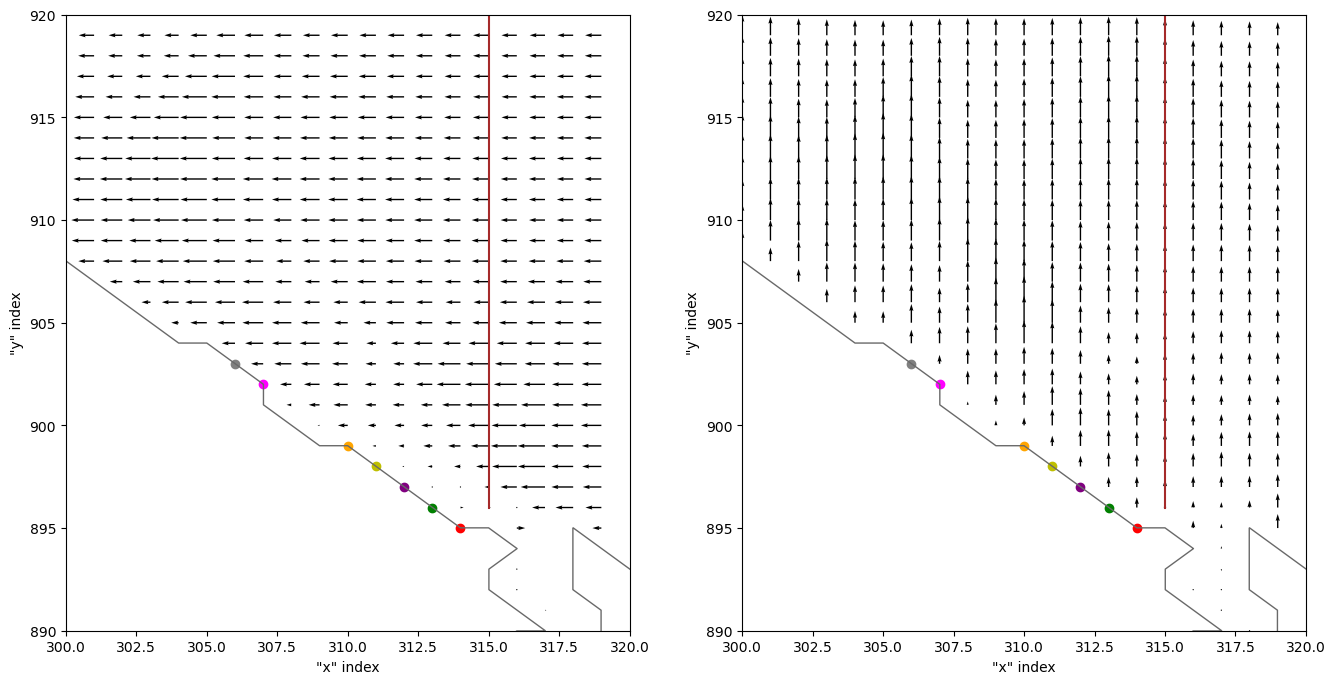

In [28]:
# u and v seperately instead of a quiver
fig, axs = plt.subplots(1,2, figsize=(16,8))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
uv_zero = np.zeros(np.shape(Y))

xmin, xmax = 300,320
ymin, ymax = 890,920

# Make plot area
for ax in axs:
    ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
    ax.set_ylim([ymin,ymax])
    ax.set_xlim([xmin,xmax])
    ax.set_ylabel('"y" index')
    ax.set_xlabel('"x" index')

    # the coast crash spots
    ax.scatter([315-1],[896-1],c='r') # 149
    ax.scatter([314-1],[897-1],c='g') # 17
    ax.scatter([311-1],[900-1],c='orange') # 25
    ax.scatter([313-1],[898-1],c='purple') # 8
    ax.scatter([312-1],[899-1],c='y') # 11
    ax.scatter([308-1],[903-1],c='magenta') # 1
    ax.scatter([307-1],[904-1],c='grey') # 1

    # and the new boundaries
    ax.plot([315,315], [896,945], c='brown')



# QUIVER (kinda)! 
axs[0].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],data.u[0,k,ymin:ymax,xmin:xmax],uv_zero[ymin:ymax,xmin:xmax],scale=15)
axs[1].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],uv_zero[ymin:ymax,xmin:xmax],data.v[0,k,ymin:ymax,xmin:xmax],scale=15)

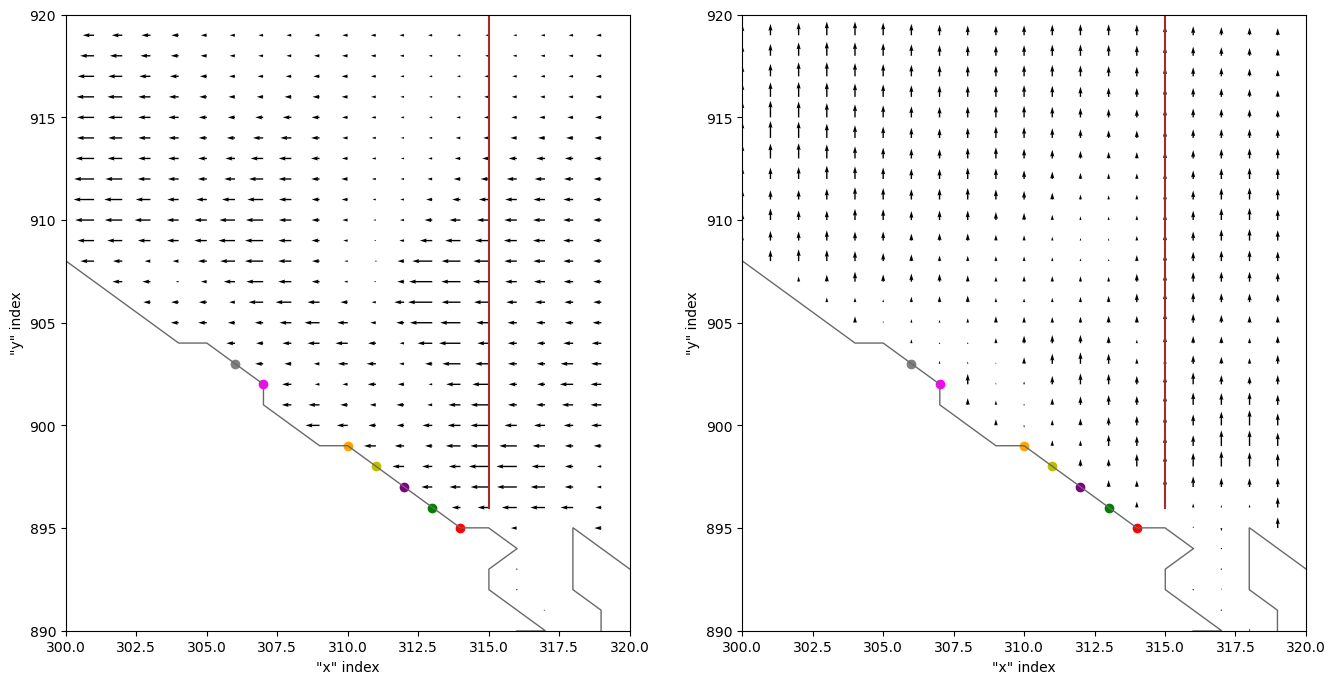

In [31]:
# same thing but for timestep WITHOUT CRASH
# u and v seperately instead of a quiver
fig, axs = plt.subplots(1,2, figsize=(16,8))

X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
uv_zero = np.zeros(np.shape(Y))

xmin, xmax = 300,320
ymin, ymax = 890,920

# Make plot area
for ax in axs:
    ax.contour(X, Y, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
    ax.set_ylim([ymin,ymax])
    ax.set_xlim([xmin,xmax])
    ax.set_ylabel('"y" index')
    ax.set_xlabel('"x" index')

    # the coast crash spots
    ax.scatter([315-1],[896-1],c='r') # 149
    ax.scatter([314-1],[897-1],c='g') # 17
    ax.scatter([311-1],[900-1],c='orange') # 25
    ax.scatter([313-1],[898-1],c='purple') # 8
    ax.scatter([312-1],[899-1],c='y') # 11
    ax.scatter([308-1],[903-1],c='magenta') # 1
    ax.scatter([307-1],[904-1],c='grey') # 1

    # and the new boundaries
    ax.plot([315,315], [896,945], c='brown')



# QUIVER (kinda)! 
axs[0].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],works.u[0,k,ymin:ymax,xmin:xmax],uv_zero[ymin:ymax,xmin:xmax],scale=15)
axs[1].quiver(X[ymin:ymax,xmin:xmax],Y[ymin:ymax,xmin:xmax],uv_zero[ymin:ymax,xmin:xmax],works.v[0,k,ymin:ymax,xmin:xmax],scale=15)

(890.0, 920.0)

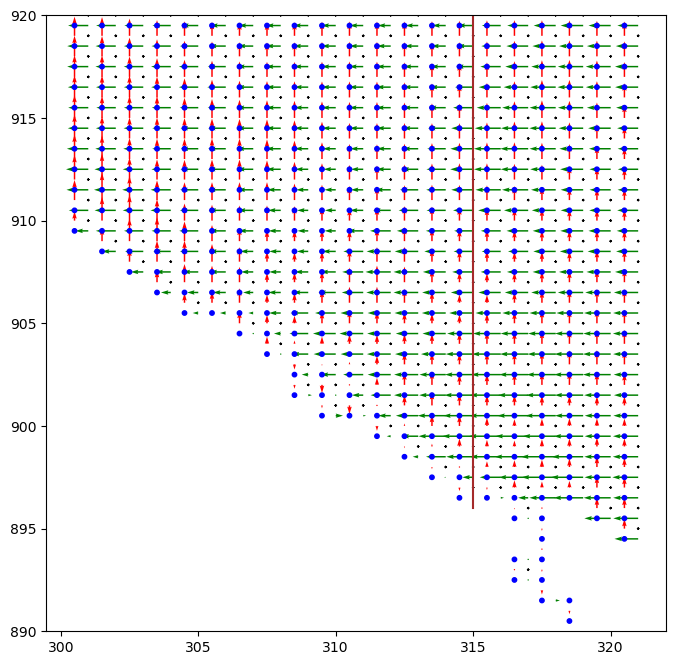

In [23]:
fig, ax = plt.subplots(1,1,figsize=(8,8))

xmin, xmax = 300,320
ymin, ymax = 890,920

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)
uv_zero = np.zeros(np.shape(X))
k=20

ax.scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax.scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
# ax.scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
# ax.scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)
ax.quiver(X+1,Y+0.5,data.u[0,k,ymin:ymax+1,xmin:xmax+1],uv_zero,scale=15,color='g')
ax.quiver(X+0.5,Y+1,uv_zero,data.v[0,k,ymin:ymax+1,xmin:xmax+1],scale=15,color='r')

# and the new boundaries
ax.plot([315,315], [896,945], c='brown')

ax.set_ylim([ymin,ymax])

(890.0, 920.0)

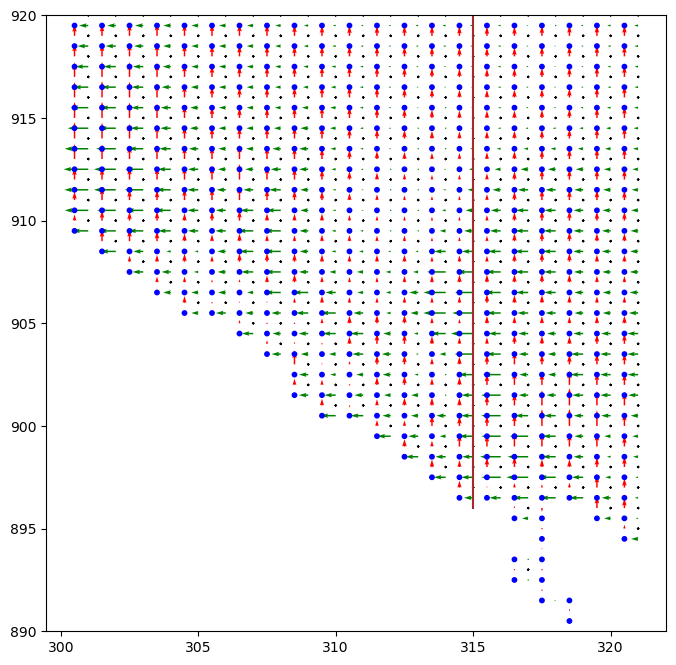

In [32]:
# same thing but for WORKING TIMESTEP
fig, ax = plt.subplots(1,1,figsize=(8,8))

xmin, xmax = 300,320
ymin, ymax = 890,920

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)
uv_zero = np.zeros(np.shape(X))
k=20

ax.scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax.scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
# ax.scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
# ax.scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)
ax.quiver(X+1,Y+0.5,works.u[0,k,ymin:ymax+1,xmin:xmax+1],uv_zero,scale=15,color='g')
ax.quiver(X+0.5,Y+1,uv_zero,works.v[0,k,ymin:ymax+1,xmin:xmax+1],scale=15,color='r')

# and the new boundaries
ax.plot([315,315], [896,945], c='brown')

ax.set_ylim([ymin,ymax])

In [37]:
print(data.v[0,0,[900-1],[311-1]].values)
print(data.u[0,0,[900-1],[311-1]].values)
# ok and the values going into the cell are also nan so idk how it got there


[[nan]]
[[nan]]


In [46]:
# maybe its where there initialised that's the problem??
# all coast crashes from x=312 and y = 899 or 900

print(grid.mask_rho[898,311].values)
print(grid.mask_rho[899,311].values)

# maybe this is the issue? says that x=312, y=899 is land

0.0
1.0


## grid compare

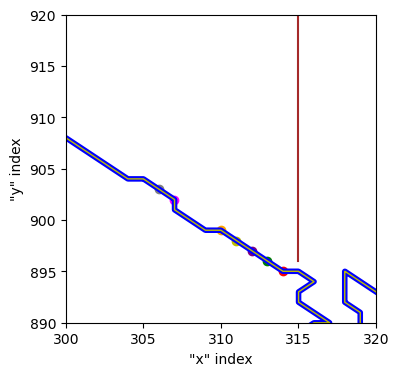

In [19]:
X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
xmin, xmax = 300,320
ymin, ymax = 890,920

# Make plot area

fig, ax = plt.subplots(1,1,figsize=(4,4))

# Overlay domain landmask and coastline - grid 7
X, Y = np.meshgrid(grid.xi_rho,grid.eta_rho)
ax.contour(X, Y, grid.mask_rho, linewidths=4, levels=[-0.01, 0.01], colors='b')
ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

# Overlay domain landmask and coastline - grid 6
X, Y = np.meshgrid(grid6.xi_rho,grid6.eta_rho)
ax.contour(X, Y, grid6.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='y')
ax.set_ylim([ymin,ymax])
ax.set_xlim([xmin,xmax])
ax.set_ylabel('"y" index')
ax.set_xlabel('"x" index')

# # the coast crash spots
ax.scatter([315-1],[896-1],c='r') # 149
ax.scatter([314-1],[897-1],c='g') # 17
ax.scatter([311-1],[900-1],c='orange') # 25
ax.scatter([313-1],[898-1],c='purple') # 8
ax.scatter([312-1],[899-1],c='y') # 11
ax.scatter([308-1],[903-1],c='magenta') # 1
ax.scatter([307-1],[904-1],c='grey') # 1



# and the new boundaries
plt.plot([315,315], [896,945], c='brown')

(890.0, 920.0)

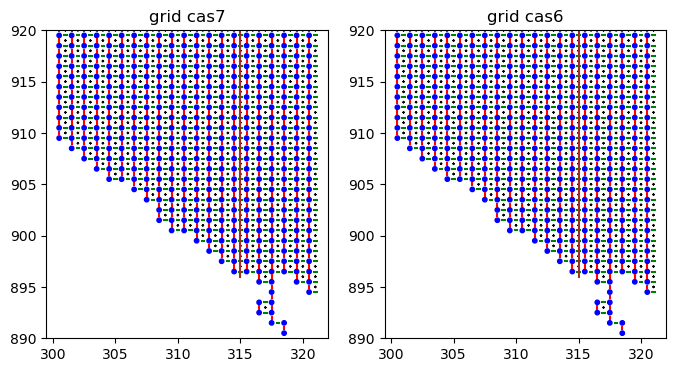

In [18]:
fig, ax = plt.subplots(1,2,figsize=(8,4))

xmin, xmax = 300,320
ymin, ymax = 890,920

x = np.arange(xmin, xmax+1)
y = np.arange(ymin, ymax+1)
X, Y = np.meshgrid(x,y)

ax[0].scatter(X+0.5,Y+0.5,grid.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax[0].scatter(X+1,Y+1,grid.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
ax[0].scatter(X+1,Y+0.5,grid.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax[0].scatter(X+0.5,Y+1,grid.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)
ax[0].set_title('grid cas7')


ax[1].scatter(X+0.5,Y+0.5,grid6.mask_rho[ymin:ymax+1,xmin:xmax+1]*10,c='b',zorder=2)
ax[1].scatter(X+1,Y+1,grid6.mask_psi[ymin:ymax+1,xmin:xmax+1],c='k',marker='x',zorder=2) # only at points that boarder 4 unmasked cells
ax[1].scatter(X+1,Y+0.5,grid6.mask_u[ymin:ymax+1,xmin:xmax+1]*10,c='g',marker='_', zorder=2)
ax[1].scatter(X+0.5,Y+1,grid6.mask_v[ymin:ymax+1,xmin:xmax+1]*10,c='r',marker='|',zorder=2)
ax[1].set_title('grid cas6')

# and the new boundaries
ax[1].plot([315,315], [896,945], c='brown')
ax[0].plot([315,315], [896,945], c='brown')

ax[0].set_ylim([ymin,ymax])
ax[1].set_ylim([ymin,ymax])

